In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


price: harga rumah (target)

area = luas/m2

bedrooms = jumlah kamar tidur

bathrooms = jumlah kamar mandi

stories = jumlah APA

mainroad = menghadap jalan utama

guestroom = kamar tamu

basement = basement

hotwaterheating = pemanas air panas

airconditional = AC

parking = parkir

prefarea = prefarea

status perbaikan

In [3]:
data.shape

(545, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
kategorikal = data.drop(columns=['price','area'])

In [34]:
kategorikal.columns

Index(['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_19520\3964116877.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True)


<AxesSubplot: >

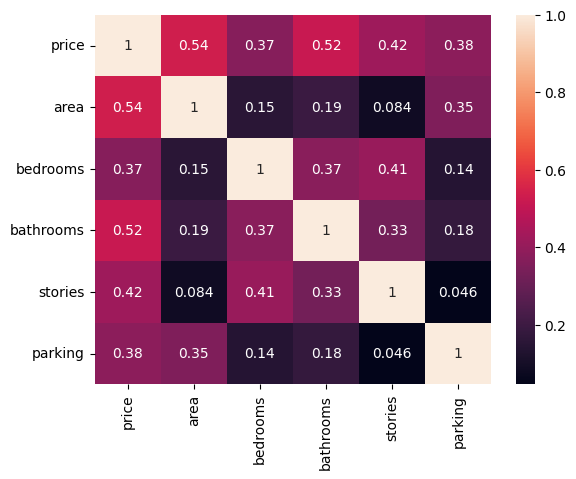

In [7]:
sns.heatmap(data=data.corr(), annot=True)

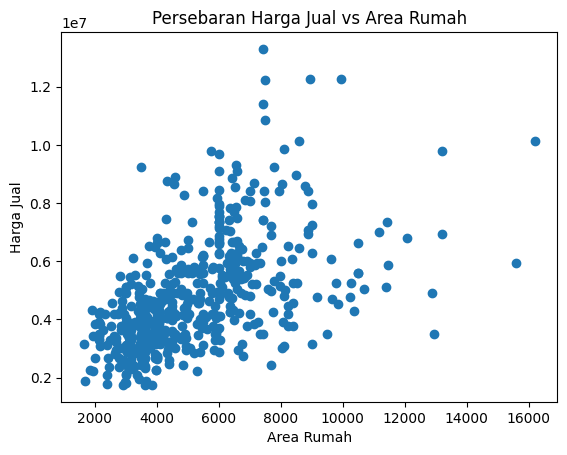

In [11]:
plt.scatter(data['area'], data['price'])
plt.title('Persebaran Harga Jual vs Area Rumah')
plt.xlabel('Area Rumah')
plt.ylabel('Harga Jual')
plt.show()

In [15]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [31]:
data['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [35]:
for column in kategorikal:
    value_counts = kategorikal[column].value_counts()
    print(f'Value Counts for column {column}:')
    print(value_counts)
    print('\n')

Value Counts for column bedrooms:
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64


Value Counts for column bathrooms:
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64


Value Counts for column stories:
2    238
1    227
4     41
3     39
Name: stories, dtype: int64


Value Counts for column mainroad:
yes    468
no      77
Name: mainroad, dtype: int64


Value Counts for column guestroom:
no     448
yes     97
Name: guestroom, dtype: int64


Value Counts for column basement:
no     354
yes    191
Name: basement, dtype: int64


Value Counts for column hotwaterheating:
no     520
yes     25
Name: hotwaterheating, dtype: int64


Value Counts for column airconditioning:
no     373
yes    172
Name: airconditioning, dtype: int64


Value Counts for column parking:
0    299
1    126
2    108
3     12
Name: parking, dtype: int64


Value Counts for column prefarea:
no     417
yes    128
Name: prefarea, dtype: int64


Value Counts for column furn